In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [54]:
data = pd.read_csv('drug_classification.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [55]:
df = pd.DataFrame(data)
print(f'df Shape: {df.shape}')
df.head()

df Shape: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [57]:
df.isna().sum().to_frame('isna').T

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
isna,0,0,0,0,0,0


In [58]:
for col in df:
    print(f"{col}: {df[col].unique()}\n")

Age: [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Sex: ['F' 'M']

BP: ['HIGH' 'LOW' 'NORMAL']

Cholesterol: ['HIGH' 'NORMAL']

Na_to_K: [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8

In [59]:
print(f"Number of dublicated: {df.duplicated().sum()}")

Number of dublicated: 0


In [60]:
categorical = df.select_dtypes(['object'])
for var in categorical:
    print(f"{var} contains {df[var].nunique()} labels")
    print(df[var].value_counts())
    print('-'*30)

Sex contains 2 labels
Sex
M    104
F     96
Name: count, dtype: int64
------------------------------
BP contains 3 labels
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
------------------------------
Cholesterol contains 2 labels
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
------------------------------
Drug_Type contains 5 labels
Drug_Type
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
------------------------------


In [61]:
df['Sex'] = df.Sex.replace(['M', 'F'], [2, 1])
df['BP'] = df.BP.replace(['HIGH', 'NORMAL', 'LOW'], [3,2,1])
df['Cholesterol'] = df.Cholesterol.replace(['HIGH', 'NORMAL'], [2, 1])
df['Drug_Type'] = df.Drug_Type.replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,1,3,2,25.355,1
1,47,2,1,2,13.093,4
2,47,2,1,2,10.114,4
3,28,1,2,2,7.798,2
4,61,1,1,2,18.043,1
...,...,...,...,...,...,...
195,56,1,1,2,11.567,4
196,16,2,1,2,12.006,4
197,52,2,2,2,9.894,2
198,23,2,2,1,14.020,2


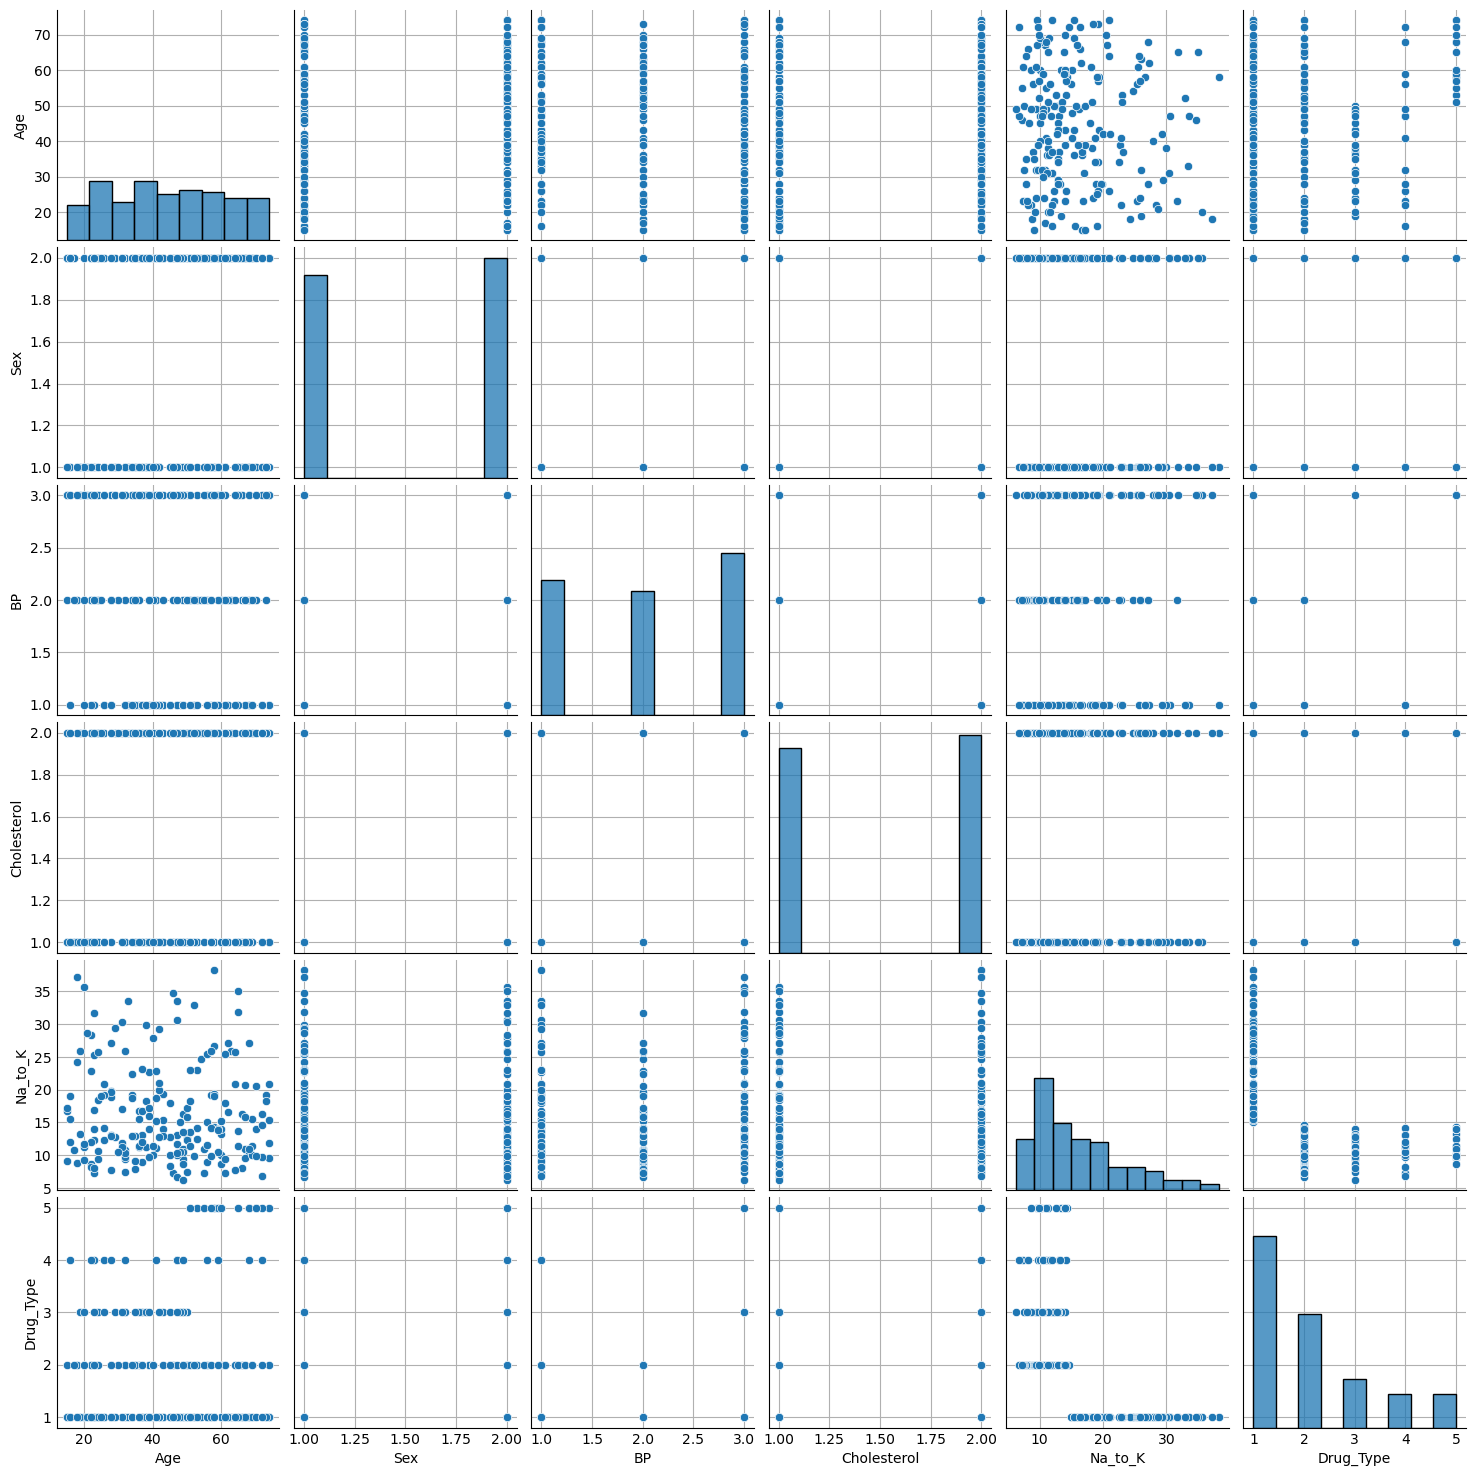

In [ ]:
%matplotlib inline
sns.pairplot(df)
plt.show()

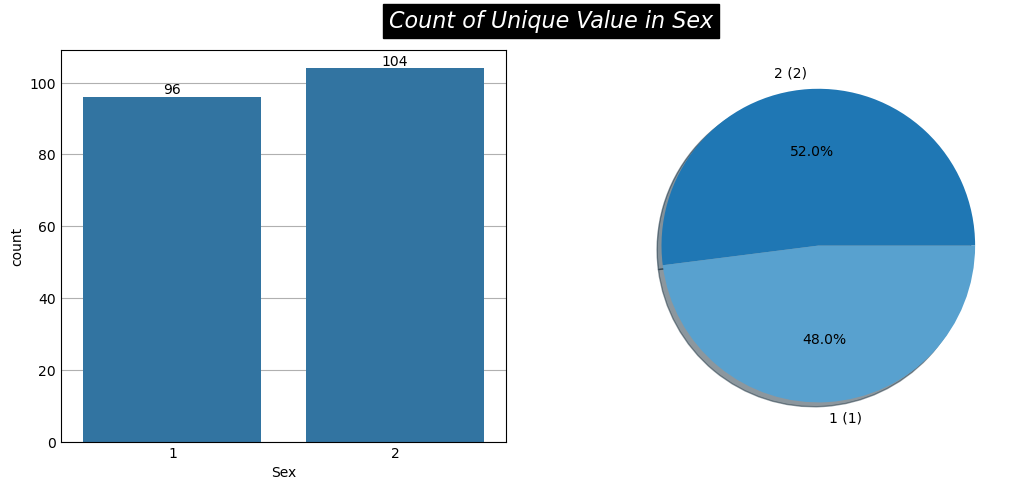

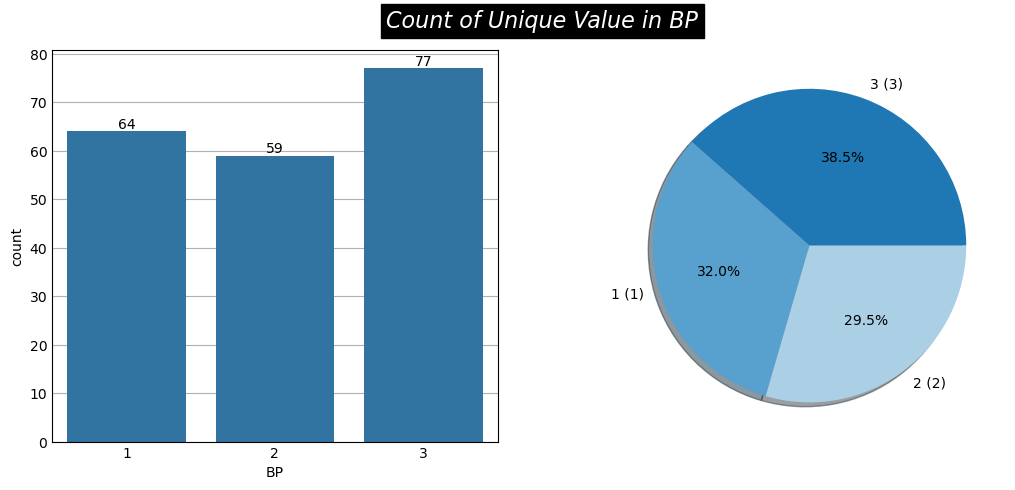

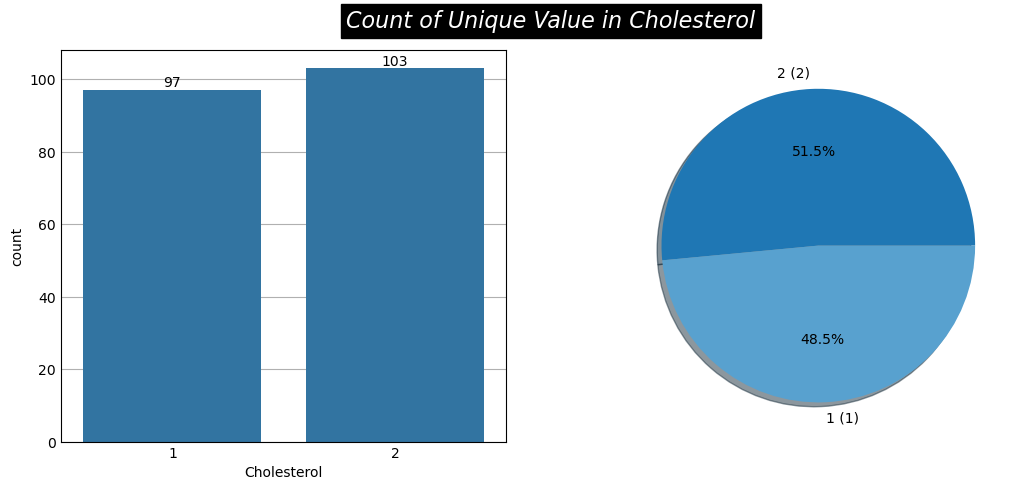

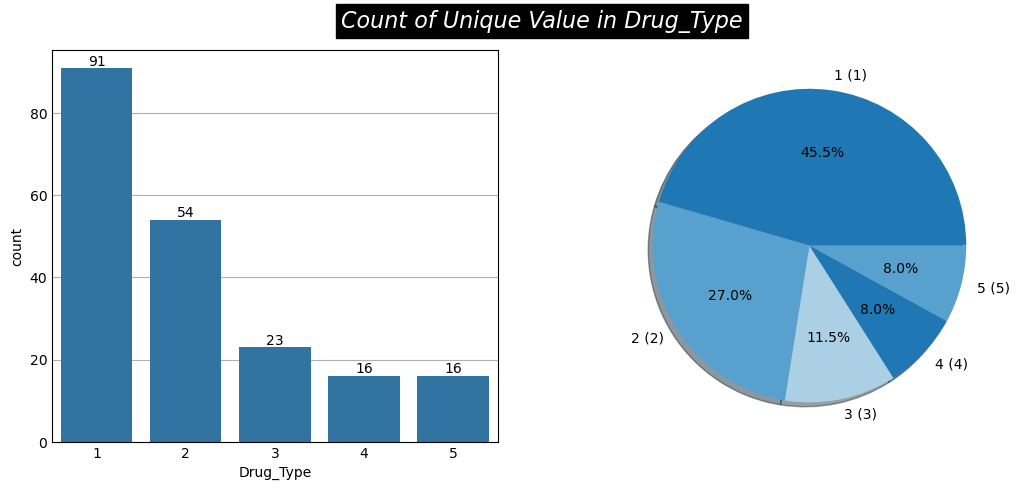

In [ ]:
for col in categorical:

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().values
    activities = [f"{i} ({var})" for i, var in zip(df[col].value_counts().index, df[col].value_counts().index)]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col}', y=1.09, **font)
    plt.show()

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
X=df.drop('Drug_Type', axis=1)
y=df['Drug_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [65]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f'The best value of `k` is {optimal_k} with an accuracy of {max(k_scores)}')


The best value of `k` is 1 with an accuracy of 0.7214285714285713


[[25  0  0  0  0]
 [ 1  7  2  1  3]
 [ 0  5  5  1  0]
 [ 0  4  0  3  0]
 [ 0  2  0  1  0]]
0.6666666666666666
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       0.39      0.50      0.44        14
           3       0.71      0.45      0.56        11
           4       0.50      0.43      0.46         7
           5       0.00      0.00      0.00         3

    accuracy                           0.67        60
   macro avg       0.51      0.48      0.49        60
weighted avg       0.68      0.67      0.67        60



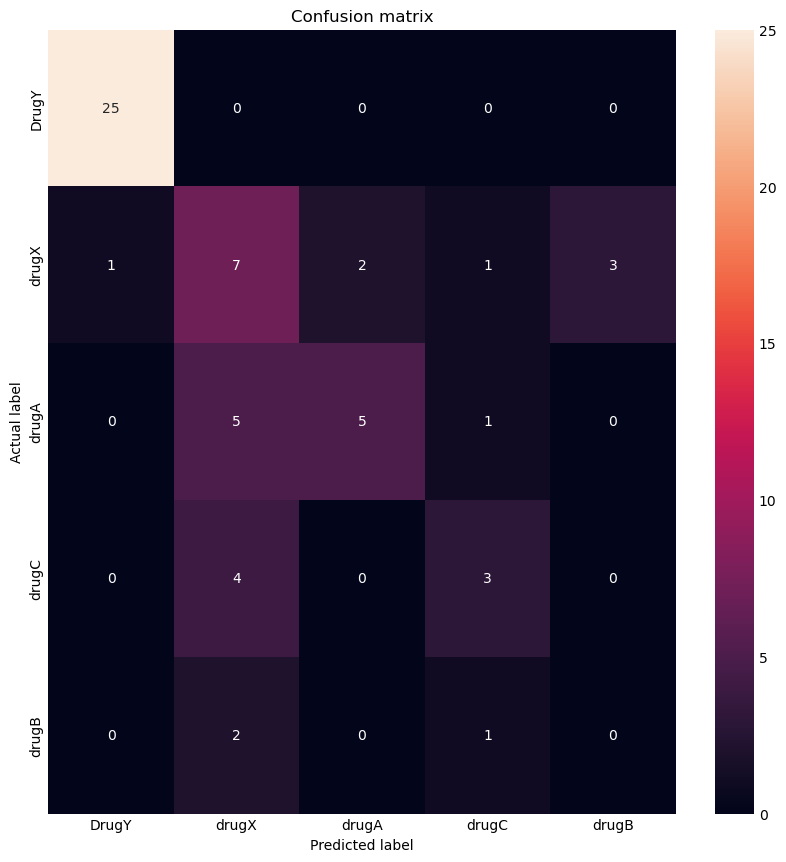

In [66]:
classifier=KNeighborsClassifier(n_neighbors=optimal_k,algorithm='auto')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
class_names=['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
plt.figure(figsize=(8, 8))
conf_matrix=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_matrix,annot=True,xticklabels=class_names,fmt='d', yticklabels=class_names)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()